<a href="https://colab.research.google.com/github/JoshuaHildebrand/CMSC320_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What factors affect whether or not a song is in Spotify charts? (temporary title)
Fall 2025 Data Science Project
Julia Devine

Contributions:
Julia Devine - I worked on A,C,D,E,F. I helped decide which dataset to use for our project. I also helped with the data exploration by working on the second conclusion and figuring out if release month affected the number of stream a song got. I also worked on the Logistic Regression ML part of the project, where I designed the model, tested it, and showed visualizations.

Joshua Hildebrand - I worked on B,C,D,E,F. Imported data and cleaned charts data. Contributed to data exploration by calculating correlation and visualizing "Correlation of Chart Appearences" and confidence intervals for "Average Streams vs Release Month". Developed Decision Tree ML model by designing, testing, and displaying visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin1')
display(df)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# What is the distribution of Spotify, Apple, Shazam, and Deezer charts and How do These Variables Correlate?

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Select Relevant Variables
charts_df = df[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']]

# Data Cleaning":
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(str)
# 'in_shazam_charts' have commas in numbers that must be removed.
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].str.replace(',','',regex = False)
charts_df['in_shazam_charts'] = charts_df['in_shazam_charts'].astype(float)


In [5]:
charts_df.describe()

,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
count,953.000000,953.000000,953.000000,903.000000
mean,12.009444,51.908709,2.666317,59.995570
std,19.575992,50.630241,6.035599,161.161093
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,0.000000,0.000000
50%,3.000000,38.000000,0.000000,2.000000
75%,16.000000,87.000000,2.000000,37.000000
max,147.000000,275.000000,58.000000,1451.000000


In [6]:
df_corr = charts_df.corr().style.background_gradient(cmap='RdBu_r', vmin = -1, vmax = 1)
display(df_corr)


,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
in_spotify_charts,1.000000,0.552232,0.600205,0.603075
in_apple_charts,0.552232,1.000000,0.383668,0.434533
in_deezer_charts,0.600205,0.383668,1.000000,0.437729
in_shazam_charts,0.603075,0.434533,0.437729,1.000000


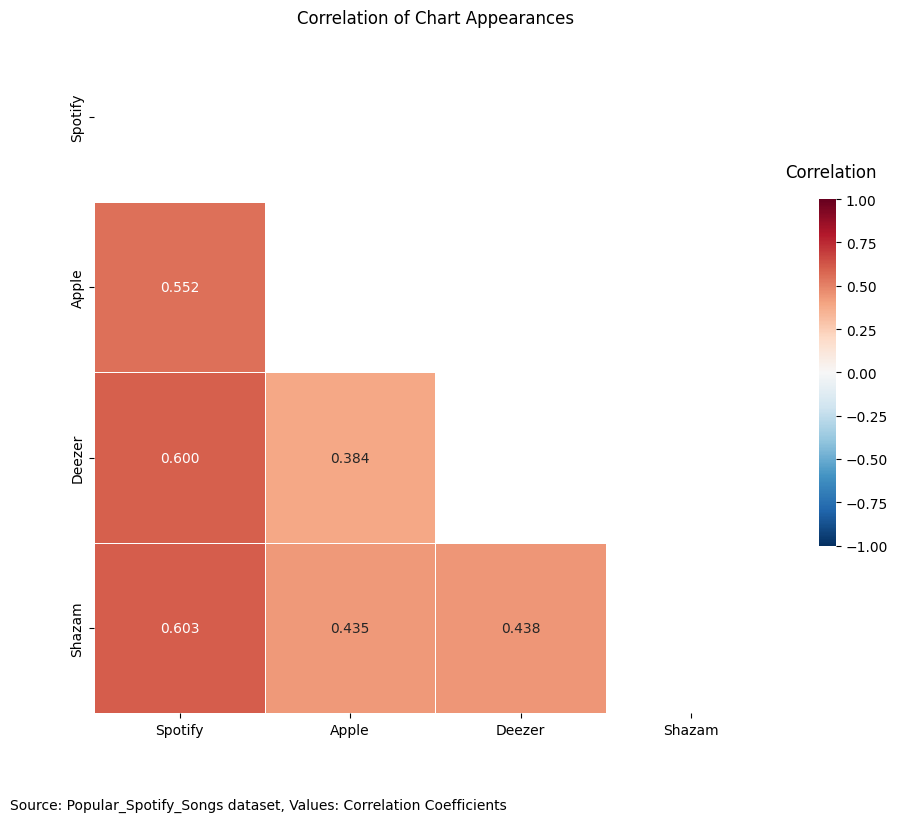

In [7]:
mask = np.triu(np.ones_like(charts_df.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(charts_df.corr(), mask=mask, cmap='RdBu_r', vmax=1, vmin = -1,
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5},
            fmt = '.3f', annot = True, label = 'Correlation')


cap = "Source: Popular_Spotify_Songs dataset, Values: Correlation Coefficients"

plt.title('Correlation of Chart Appearances')
plt.legend(title = 'Correlation',bbox_to_anchor=(1.165, 0.825), frameon = False,
           title_fontsize = 'large')
ax.set_xticklabels(['Spotify', 'Apple', 'Deezer', 'Shazam'])
ax.set_yticklabels(['Spotify', 'Apple', 'Deezer', 'Shazam'])
plt.figtext(0.5, 0.01, cap, wrap=True, horizontalalignment='right',
            fontsize=10)


plt.show()

**First Conclusion:**

Based on the describe command, the data clearly contains outliers meaning that using statistical methods that involve calculations using the mean will be inappropriate as the data is not normally distributed.

To best understand how the data in each music platform is related, the best statistical method to use is correlation. All the data is numeric, so computing correlation is an efficent way to answer the guiding question.

The correlation reveals that all music platform's charts are positively related. The strongest relationship is a correlation of 0.603 between Spotify and Shazam. Whereas the weakest relationship is between Apple and Deezer with a correlation of 0.384.

This insight these statistics show is that the count of songs in charts moves together across all platforms. If a song is in a high number of charts in one platform it is likely to be in a high number of charts in another platform.


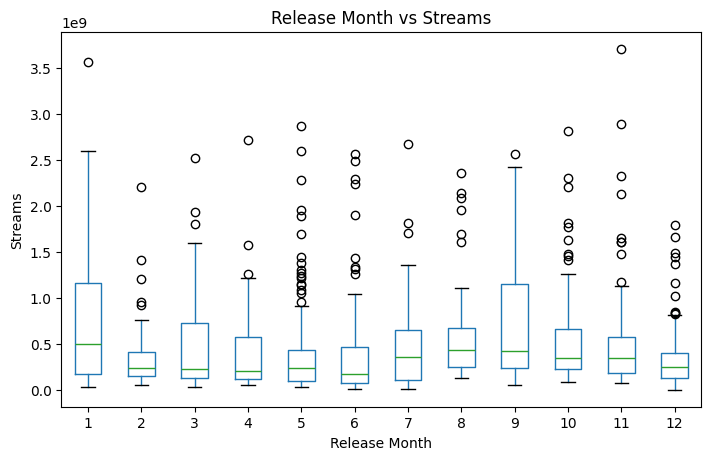

F-statistic: 4.795282070206737
p-value: 3.267617433013214e-07
    group1  group2      meandiff   p-adj         lower         upper  reject
0        1       2 -3.743526e+08  0.0009 -6.554398e+08 -9.326542e+07    True
2        1       4 -3.233602e+08  0.0065 -5.970507e+08 -4.966966e+07    True
3        1       5 -3.118371e+08  0.0004 -5.369085e+08 -8.676563e+07    True
4        1       6 -3.174615e+08  0.0023 -5.689846e+08 -6.593831e+07    True
10       1      12 -3.579327e+08  0.0005 -6.204188e+08 -9.544673e+07    True
17       2       9  3.814909e+08  0.0115  4.508390e+07  7.178978e+08    True
34       4       9  3.304984e+08  0.0496  2.467996e+05  6.607499e+08    True
41       5       9  3.189753e+08  0.0181  2.774210e+07  6.102085e+08    True
47       6       9  3.245997e+08  0.0331  1.247228e+07  6.367271e+08    True
62       9      12 -3.650710e+08  0.0111 -6.860983e+08 -4.404366e+07    True


In [8]:
df.dtypes
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df.isnull().sum()
# only 1 na value out of 953 for streams, so less than 5% so we should drop it
df = df.dropna(subset = ['streams'])
df['streams'] = df['streams'].astype(int)

# Conclusion 2: Does a certain release month lead to more streams?
# Plot release month and streams
df.boxplot(column='streams', by='released_month', figsize=(8,5))
plt.title("Release Month vs Streams")
plt.suptitle("")  # removes the automatic pandas subtitle
plt.xlabel("Release Month")
plt.ylabel("Streams")
plt.grid(False)
plt.show()

# Hypothesis Testing - using Anova
groups = [group['streams'].values for name, group in df.groupby('released_month')]

f_statistic, p_value = stats.f_oneway(*groups)
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Post-Hoc test for Anova
tukey_results = pairwise_tukeyhsd(
    endog=df['streams'],
    groups=df['released_month'],
    alpha=0.05
)
tukey_df = pd.DataFrame(
    data=tukey_results.summary().data[1:],
    columns=tukey_results.summary().data[0]
)
significant_results = tukey_df[tukey_df['reject'] == True]
print(significant_results)

Second Conclusion: The Second conclusion is looking at whether a songs release month affected the number of streams the song got. For this analysis we did an anova and an post-hoc test. We find that there is statistically significant eveidence that the release month affects the number of streams a song gets. We got a p-value of 3.267617433013214e-07 which is less than our alpha of 0.05. In the post-hoc Turkey test we have that the following month pairs are statistically different: (1,2), (1,4), (1,5), (1,6), (1,12), (2,9), (4,9), (5,9), (6,9), (9,12).

We chose an Anova test because we wanted to compare multiple means. We did have to remove one row of NA data, but it was less than 5% of the data.

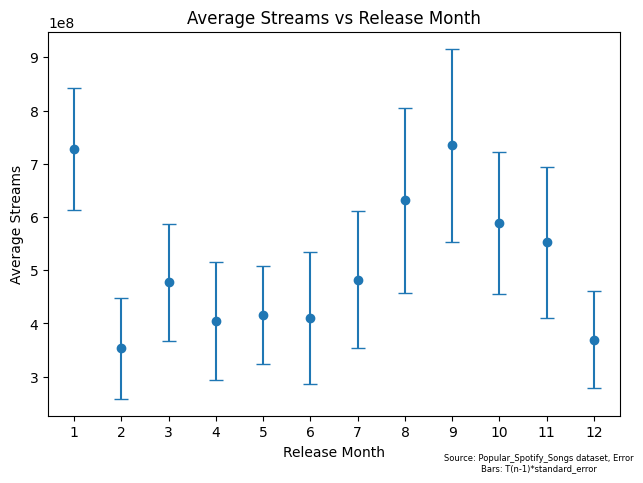

In [ ]:



df_ANOVA = df[['streams','released_month']]

df_95conf = df_ANOVA.groupby('released_month')['streams'].mean().reset_index(name='mean')
df_95conf['std_error'] = df_ANOVA.groupby('released_month')['streams'].sem().values

df_95conf['n'] = df_ANOVA.groupby('released_month').size().values

df_95conf['t_stat'] = stats.t.ppf(0.975, df_95conf['n'] - 1)


plt.errorbar(df_95conf['released_month'], df_95conf['mean'],
             yerr=df_95conf['std_error']*df_95conf['t_stat'],
             fmt='o', capsize=5)
plt.title('Average Streams vs Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average Streams')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticklabels(['1*10^8','2*10^8','3*10^8','4*10^8'])
cap = 'Source: Popular_Spotify_Songs dataset, Error Bars: T(n-1)*standard_error'
plt.figtext(0.85, 0.01, cap, wrap=True, horizontalalignment='center', fontsize=6)
plt.tight_layout()


plt.show()


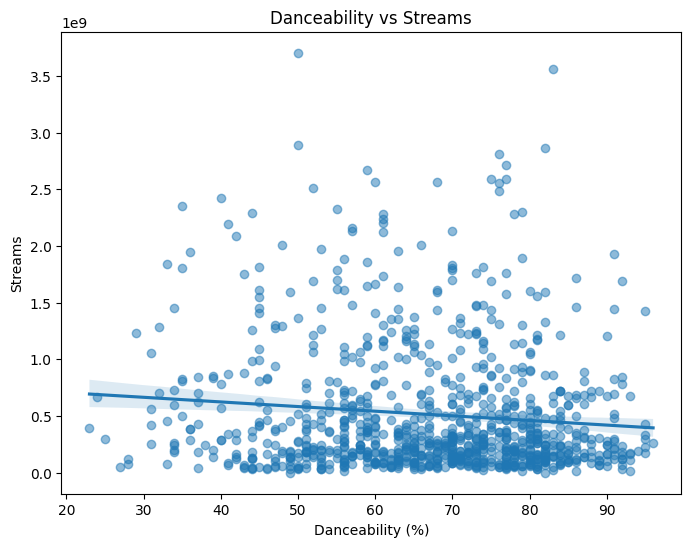

Pearson Correlation: -0.105, p-value: 1.1195e-03
                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.68
Date:                Fri, 05 Dec 2025   Prob (F-statistic):            0.00112
Time:                        16:40:58   Log-Likelihood:                -20533.
No. Observations:                 952   AIC:                         4.107e+04
Df Residuals:                     950   BIC:                         4.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors='coerce')

# Drop missing rows
df = df.dropna(subset=['streams', 'danceability_%'])

# Scatterplot with regression line
plt.figure(figsize=(8,6))
sns.regplot(x='danceability_%', y='streams', data=df, scatter_kws={'alpha':0.5})
plt.title('Danceability vs Streams')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.show()

# Pearson correlation
corr_dance, p_value = stats.pearsonr(df['danceability_%'], df['streams'])
print(f"Pearson Correlation: {corr_dance:.3f}, p-value: {p_value:.4e}")

# Simple linear regression
X = sm.add_constant(df['danceability_%'])
model = sm.OLS(df['streams'], X).fit()
print(model.summary())


Third Conclusion:
The third conclusion looks at whether a song’s danceability affects the number of streams it gets. To explore this, a Pearson correlation and a simple linear regression were used. The correlation was weakly negative (r = -0.105, p < 0.01), meaning that as danceability increases, the number of streams slightly decreases on average. The regression line also showed a small negative slope, which supports this relationship. However, the R² value was only 0.011, meaning danceability alone explains about 1% of the variation in streams. This suggests that while danceability may have some effect, other factors like artist popularity, marketing, or playlist placement most likely have a stronger impact on how many times a song is streamed.

In [ ]:
# Decisions Tree ML Model on Predicting Above Average Numbers for in_spotify_charts

# Select Numerical Variables
charts2 = df.drop(['track_name', 'artist(s)_name','key','mode'], axis = 1)
warnings.filterwarnings('ignore')
# Data Cleaning":
charts2['in_shazam_charts'] = charts2['in_shazam_charts'].astype(str)

## 'in_shazam_charts' have commas in numbers that must be removed.
charts2['in_shazam_charts'] = charts2['in_shazam_charts'].str.replace(',','',regex = False)
charts2['in_shazam_charts'] = charts2['in_shazam_charts'].astype(float)

charts2['streams'] = charts2['streams'].astype(str)
charts2['streams'] = charts2['streams'].str.replace(',','',regex = False)

## Erroneous data entry.
charts2['streams'] = charts2['streams'].str.replace('BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3','0',regex = False)
charts2['streams'] = charts2['streams'].astype(float)

charts2['in_deezer_playlists'] = charts2['in_deezer_playlists'].astype(str)
charts2['in_deezer_playlists'] = charts2['in_deezer_playlists'].str.replace(',','',regex = False)
charts2['in_deezer_playlists'] = charts2['in_deezer_playlists'].astype(float)

charts2_corr = charts2.corr().style.background_gradient(cmap='RdBu_r', vmin = -1, vmax = 1)
display(charts2_corr)



,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.087586,0.037995,-0.017549,-0.101966,-0.018507,-0.135783,-0.051074,-0.088597,-0.071506,-0.003732,-0.017383,-0.038375,0.207027,0.127960,0.137096,-0.101061,-0.050225,0.042730,0.119900
released_year,0.087586,1.000000,0.076714,0.174282,-0.392204,0.069678,-0.224273,-0.198998,-0.035842,-0.306812,0.095389,0.019447,-0.005334,0.187333,-0.059355,0.095226,-0.124156,-0.014562,-0.005819,0.133819
released_month,0.037995,0.076714,1.000000,0.080313,-0.104757,-0.047623,-0.023556,-0.000164,-0.019064,-0.088004,-0.005286,-0.091419,-0.039252,-0.046403,-0.118571,-0.083710,0.054430,0.033985,-0.012348,0.039838
released_day,-0.017549,0.174282,0.080313,1.000000,-0.079669,0.021877,0.011921,0.026410,0.011086,-0.084558,0.073288,0.020131,-0.030177,0.048951,0.042779,0.050545,-0.005788,0.019280,0.001566,-0.015826
in_spotify_playlists,-0.101966,-0.392204,-0.104757,-0.079669,1.000000,0.164331,0.789725,0.708277,0.271317,0.826404,0.144342,0.081239,-0.019598,-0.106534,-0.021883,0.033808,-0.064421,-0.028134,-0.046695,-0.089722
in_spotify_charts,-0.018507,0.069678,-0.047623,0.021877,0.164331,1.000000,0.246251,0.233354,0.552232,0.088358,0.600205,0.603075,0.034713,0.030071,0.035531,0.081920,-0.054987,-0.010146,-0.047552,-0.081765
streams,-0.135783,-0.224273,-0.023556,0.011921,0.789725,0.246251,1.000000,0.772155,0.320896,0.598125,0.228897,0.025341,-0.002011,-0.104451,-0.041749,-0.026311,-0.003746,-0.044703,-0.048232,-0.111568
in_apple_playlists,-0.051074,-0.198998,-0.000164,0.026410,0.708277,0.233354,0.772155,1.000000,0.414523,0.472109,0.369032,0.155180,0.023725,-0.025326,0.057075,0.052615,-0.061781,-0.057219,-0.049596,-0.108011
in_apple_charts,-0.088597,-0.035842,-0.019064,0.011086,0.271317,0.552232,0.320896,0.414523,1.000000,0.173542,0.383668,0.434533,0.030962,-0.025204,0.047733,0.104828,-0.076793,-0.013145,-0.018733,-0.151539
in_deezer_playlists,-0.071506,-0.306812,-0.088004,-0.084558,0.826404,0.088358,0.598125,0.472109,0.173542,1.000000,0.066593,0.077865,-0.035395,-0.071489,-0.013859,0.064865,-0.063282,-0.016973,-0.026743,-0.062274


In [ ]:
# Select top 5 correlated variables with in_spotify_charts other than chart variables
X = charts2[['in_apple_playlists', 'in_spotify_playlists', 'streams',
             'in_deezer_playlists', 'energy_%']]
# Create binary variable for observations that are above average in number
Y = (charts2['in_spotify_charts'] > charts2['in_spotify_charts'].mean())

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state= 99)
# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 99)
model = DecisionTreeClassifier()
cv_score = cross_val_score(estimator = model, X = X_train_scaled,
                                y = y_train, cv = skf)
print(f"Cross-validated Accuracy: {cv_score.mean() } (+/- {cv_score.std() })")

Cross-validated Accuracy: 0.6889490884072927 (+/- 0.012813274122939559)


In [ ]:
#Evaluate Performance of Decision Tree Model
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6178010471204188
              precision    recall  f1-score   support

       False       0.70      0.73      0.71       125
        True       0.44      0.41      0.43        66

    accuracy                           0.62       191
   macro avg       0.57      0.57      0.57       191
weighted avg       0.61      0.62      0.61       191



In [ ]:
# Identify Feature Importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance',
                                                          ascending=False)

print(feature_importance_df)


                Feature  Importance
2               streams    0.245969
1  in_spotify_playlists    0.219017
4              energy_%    0.206334
3   in_deezer_playlists    0.191786
0    in_apple_playlists    0.136894


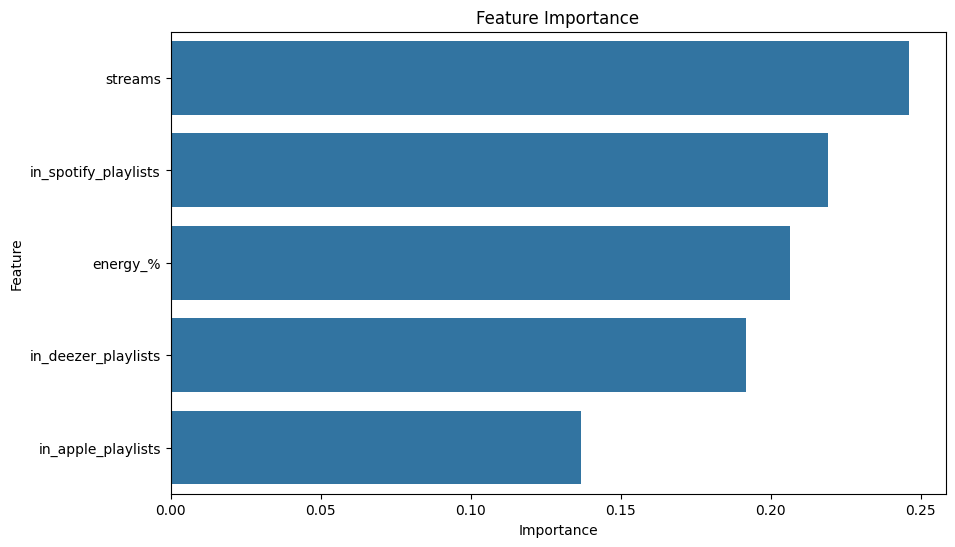

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Logistic regression Model to compare against Decision Tree
# Select top 5 correlated variables (after in_apple_charts, in_deezer_charts, and in_shazam_charts) with in_spotify_charts
X = charts2[['in_apple_playlists', 'in_spotify_playlists', 'streams',
             'in_deezer_playlists', 'energy_%']]
# Create binary variable for observations that are above average in number
Y = (charts2['in_spotify_charts'] > charts2['in_spotify_charts'].mean())

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state= 99)
# Normalize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 99)
model = LogisticRegression()
cv_score = cross_val_score(estimator = model, X = X_train_scaled,
                                y = y_train, cv = skf)
print(f"Cross-validated Accuracy: {cv_score.mean() } (+/- {cv_score.std() })")


Cross-validated Accuracy: 0.7073787409700723 (+/- 0.02258839338330849)


In [ ]:
#Evaluate Performance of Model
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
r_sq = model.score(X_test_scaled, y_test)
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")
print(f"R-squared: {r_sq}")
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Intercept: [-0.94677845]
Coefficients: [[-0.11176931  0.15279366  0.60999959 -0.28973082  0.29746519]]
R-squared: 0.6858638743455497
Accuracy: 0.6858638743455497
              precision    recall  f1-score   support

       False       0.69      0.94      0.80       125
        True       0.65      0.20      0.30        66

    accuracy                           0.69       191
   macro avg       0.67      0.57      0.55       191
weighted avg       0.68      0.69      0.63       191



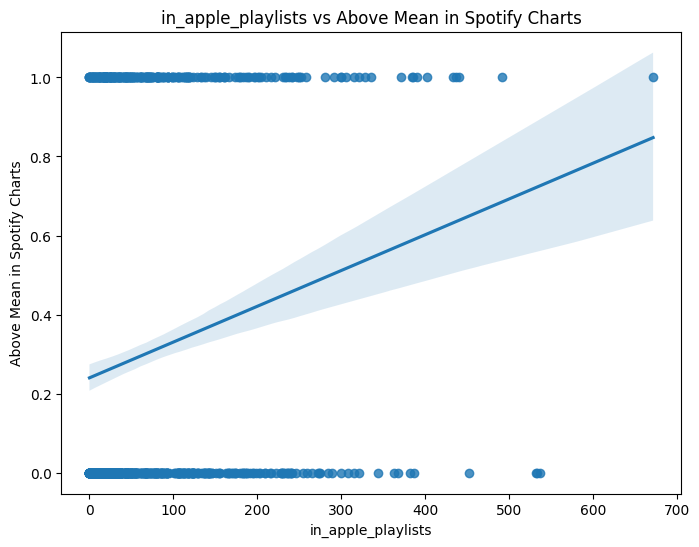

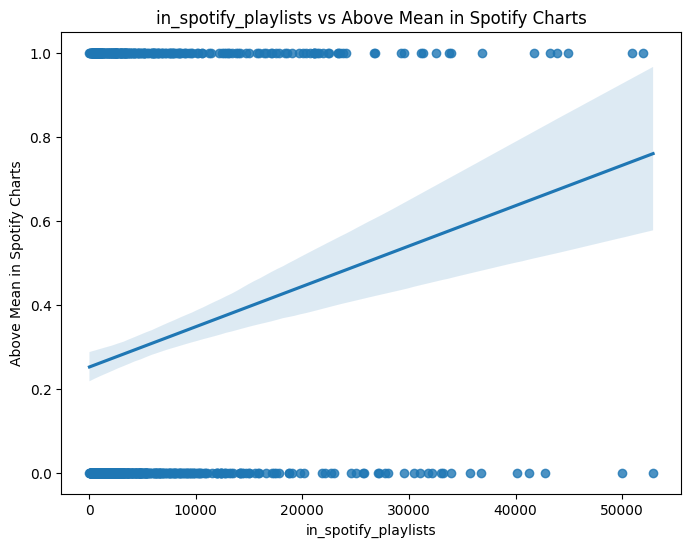

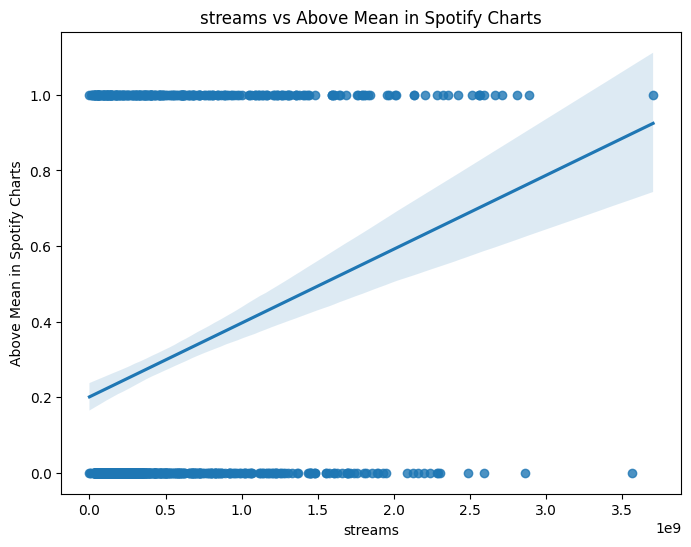

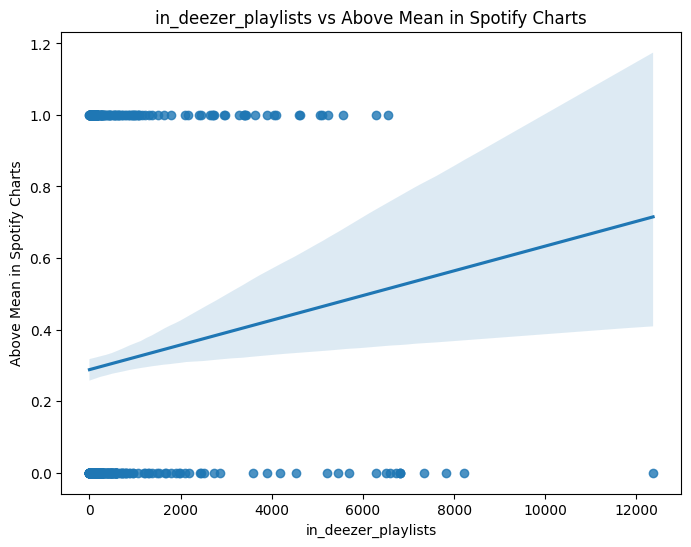

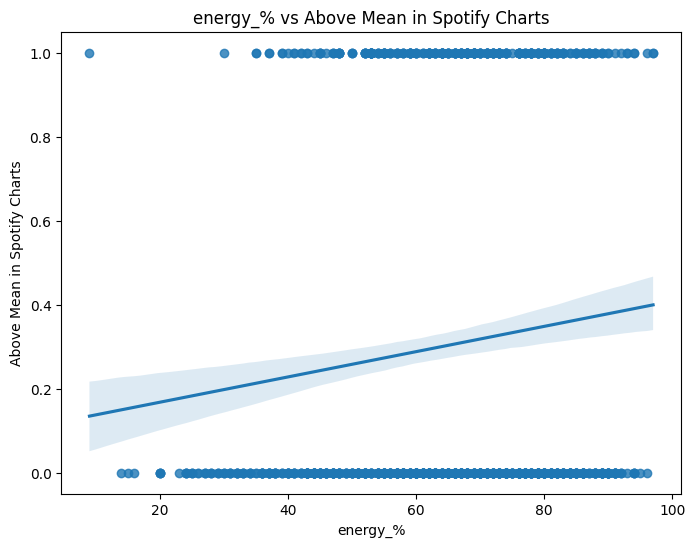

In [ ]:
# Create regression plots for each covariate
for i, covariates in enumerate(X):
    plt.figure(figsize=(8,6))
    sns.regplot(x=covariates, y=Y, data=charts2)
    plt.title(f'{covariates} vs Above Mean in Spotify Charts')
    plt.xlabel(covariates)
    plt.ylabel('Above Mean in Spotify Charts')
    plt.show()


In [ ]:
!git commit -m "added a third conclusion using regression and Pearson correlation"


fatal: not a git repository (or any of the parent directories): .git
